<a href="https://colab.research.google.com/github/h-khandahari/parliament_data/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Effect of unemployment on Hate Crime

## Import useful modules

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Download Datasets

The spreadsheets have been downloaded and stored on a GitHub repository so that they can be used in this notebook. The code below clones the repository into the notebook.

In [0]:
!git clone https://github.com/h-khandahari/parliament_data.git


In [3]:
cd parliament_data

/content/parliament_data


## Data Preparation

In [4]:
ls Data #This just checks that the files are loaded

Employment.xlsx  Hate_Crime.xlsx


### Unemployment Data

This is the data, as given in the spreadsheet for employment statistics.
It shows number the number of unemployed people (1000s) for each region



In [54]:
dataset1 = pd.read_excel('Data/Employment.xlsx', sheet_name="Unemployment", skiprows=5, usecols="B:Q", nrows=13, index_col=0)
dataset1 = dataset1.drop('UK')
dataset1


,2004/05,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19
North East,69.766,73.906,81.980,79.050,101.150,120.079,124.301,133.186,124.828,122.743,100.684,95.526,91.052,69.448,72.694
North West,157.998,167.077,183.351,193.985,231.603,297.370,264.369,304.397,288.620,270.526,222.025,185.386,178.495,157.336,139.791
Yorks and Humber,107.431,129.317,140.247,131.417,179.931,229.023,221.909,249.258,242.401,226.273,189.923,162.752,131.808,129.389,120.828
East Midlands,91.637,103.027,115.537,117.893,145.364,166.350,168.346,184.419,177.804,164.036,124.114,103.705,100.767,96.606,112.307
West Midlands,133.737,136.703,146.222,166.914,200.328,251.729,239.097,246.096,241.950,226.093,178.026,158.703,153.240,143.912,132.756
East,108.251,114.092,128.994,123.033,155.113,195.051,197.129,202.897,200.270,178.911,150.954,120.496,117.938,117.781,107.792
London,266.483,296.864,293.887,270.172,303.947,388.164,372.790,412.861,403.666,375.783,307.305,281.113,273.364,241.713,239.556
South East,154.539,169.337,191.238,178.266,206.219,277.487,259.073,266.660,275.147,247.682,211.739,190.268,177.903,158.648,153.803
South West,88.355,85.935,99.552,98.333,121.303,165.273,159.166,164.531,158.076,144.034,134.119,112.729,108.117,93.540,85.566
Wales,64.909,71.252,75.247,79.704,98.033,119.393,121.335,122.427,121.707,110.537,99.678,81.019,65.513,73.523,68.384


### Hate Crime Data

This is the data, as given in the spreadsheet for hate crime statistics.
It shows hate crime incidents for each Police Force Area (not for each region, therefore incosistent with the previous dataset)



In [7]:
dataset2 = pd.read_excel('Data/Hate_Crime.xlsx', sheet_name="Police Force Offences Dashboard", skiprows=4, usecols="B:I", nrows=44, index_col=0)
dataset2 = dataset2.drop('England')
dataset2

,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18
Police Force Area,,,,,,,
Avon and Somerset,1241,1040,1179,1430,1428,2071,2357
Bedfordshire,266,274,280,454,513,516,787
Cambridgeshire,338,224,276,403,459,785,887
Cheshire,293,438,542,535,564,842,1014
Cleveland,307,328,302,425,471,631,721
Cumbria,194,142,164,182,216,198,263
Derbyshire,440,400,356,413,461,469,562
Devon and Cornwall,737,730,778,658,561,740,932
Dorset,226,155,145,222,308,320,418


## Preparing data

Here, the datasets are made consisent by converting each Police Force Area (PFA) , given in the hate crime dataset to a 'NUTS' region, given in the unemployment statistics dataset. 

First, a Python dictionary is created to allow easy conversion between a PFA and its corresponding NUTS region

In [0]:

pfa_to_region = {"Avon and Somerset": "South West",
                 "Bedfordshire": "East",
                 "Cambridgeshire": "East",
                 "Cheshire": "North West",
                 "Cleveland": "North East",
                 "Cumbria": "North West",
                 "Derbyshire": "East Midlands",
                 "Devon and Cornwall": "South West",
                 "Dorset": "South West",
                 "Durham": "North East",
                 "Essex": "East",
                 "Gloucestershire": "South West",
                 "Greater Manchester":"North West",
                 "Hampshire":"South East",
                 "Hertfordshire":"East",
                 "Humberside": "Yorks and Humber",
                 "Kent": "South East",
                 "Lancashire":"North West",
                 "Leicestershire": "East Midlands",
                 "Lincolnshire": "East Midlands",
                 "London, City of": "London",
                 "Merseyside": "North West",
                 "Metropolitan Police": "London",
                 "Norfolk": "East",
                 "North Yorkshire": "Yorks and Humber",
                 "Northamptonshire": "East Midlands",
                 "Northumbria": "North East",
                 "Nottinghamshire": "East Midlands",
                 "South Yorkshire": "Yorks and Humber",
                 "Staffordshire": "West Midlands",
                 "Suffolk": "East",
                 "Surrey": "South East",
                 "Sussex": "South East",
                 "Thames Valley": "South East",
                 "Warwickshire": "West Midlands",
                 "West Mercia": "West Midlands",
                 "West Midlands": "West Midlands",
                 "West Yorkshire":"Yorks and Humber",
                 "Wiltshire": "South West",
                 "Dyfed-Powys": "Wales",
                 "North Wales": "Wales",
                 "South Wales": "Wales",
                 "Gwent": "Wales"}

Then, a new column is added to the dataset, containing the NUTS region

In [0]:
dataset3 = dataset2.copy()

get_regions = [pfa_to_region[i] for i in dataset3.index]
dataset3['Region'] = get_regions
dataset3

Finally, the dataset is grouped by the NUTS region and displayed.
Now the two datasets are consistent so each region can be compared individually

In [11]:
dataset4 = dataset3.groupby('Region').sum()
dataset4

,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18
Region,,,,,,,
East,2708,2617,2613,3189,3359,4845,5470
East Midlands,2616,2232,2299,2413,2404,3012,3725
London,8034,9453,9809,11594,13385,16016,15537
North East,1091,986,1065,1398,1776,2581,2980
North West,5335,4981,5530,6211,7060,8409,11182
South East,3982,3682,3939,4508,5415,7078,8833
South West,2601,2385,2491,2741,2905,3835,4475
Wales,1368,1398,1412,1677,1747,2080,2298
West Midlands,4006,3838,3957,4357,5042,6290,6716


## Visualisations

### Nationwide Hate Crime vs Nationwide Unemployment

In [0]:
x_unemployment = dataset1.columns.tolist()[7:-1]
y_unemployment = dataset1.sum()[7:-1]

In [0]:
x_crime = dataset4.columns.tolist()
y_crime = dataset4.sum()

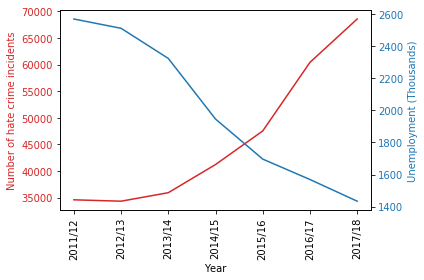

In [75]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of hate crime incidents', color=color)
ax1.plot(x_crime, y_crime, color=color)
plt.xticks(rotation=90)

ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Unemployment (Thousands)', color=color)  
ax2.plot(x_unemployment, y_unemployment, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
